In [1]:
#%set_env PYSPARK_PYTHON /usr/bin/python

In [2]:
import platform,os
os_name = platform.system()
hdfs_home = "/user/" + os.getenv("HOME").split("/")[2]

In [3]:
print(hdfs_home)
print(os_name)

/user/kranthidr
Linux


In [4]:
path = os.getenv("HOME")+"/data/neuro/"

In [5]:
path

'/home/kranthidr/data/neuro/'

In [6]:
import findspark
findspark.init('/usr/hdp/current/spark2-client')
findspark.find()

'/usr/hdp/current/spark2-client'

In [7]:
import pyspark

In [8]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("ch11ThunderProject").getOrCreate()

In [9]:
print(spark.version)

2.3.0.2.6.5.0-292


In [10]:
sc = spark.sparkContext

In [11]:
#sc.addPyFile('/home/kranthidr/.virtualenvs/pyspark27-lab/lib/python2.7/site-packages.zip')

In [12]:
# coding=utf-8

# Copyright 2015 and onwards Sanford Ryza, Uri Laserson, Sean Owen and Joshua Wills
#
# See LICENSE file for further information.

# this code assumes you are working from an interactive Thunder (PySpark) shell

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import thunder as td
%matplotlib inline
##################
# data exploration
##################

In [13]:
# load some zebrafish brain data
data = td.images.fromtif(path+'tif-stack', engine=sc)

In [14]:
type(data)

thunder.images.images.Images

In [15]:
# explore the resulting object
print(data)

Images
mode: spark
dtype: uint8
shape: (20, 2, 76, 87)


In [16]:
print(data.values)

BoltArray
mode: spark
shape: (20, 2, 76, 87)



In [17]:
print(data.values.first())

[[[26 26 26 ... 26 26 26]
  [26 26 26 ... 26 26 26]
  [26 26 26 ... 27 27 26]
  ...
  [26 26 26 ... 27 27 26]
  [26 26 26 ... 27 26 26]
  [25 25 25 ... 26 26 26]]

 [[25 25 25 ... 26 26 26]
  [25 25 25 ... 26 26 26]
  [26 26 26 ... 26 26 26]
  ...
  [26 26 26 ... 26 26 26]
  [26 26 26 ... 26 26 26]
  [25 25 25 ... 26 26 26]]]


In [18]:
print(data.values._rdd)

PythonRDD[3] at RDD at PythonRDD.scala:48


In [19]:
print(data.values._rdd.first())

((0,), array([[[26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 27, 27, 26],
        ...,
        [26, 26, 26, ..., 27, 27, 26],
        [26, 26, 26, ..., 27, 26, 26],
        [25, 25, 25, ..., 26, 26, 26]],

       [[25, 25, 25, ..., 26, 26, 26],
        [25, 25, 25, ..., 26, 26, 26],
        [26, 26, 26, ..., 26, 26, 26],
        ...,
        [26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 26, 26, 26],
        [25, 25, 25, ..., 26, 26, 26]]], dtype=uint8))


In [20]:
print(data.shape)

(20, 2, 76, 87)


In [21]:
print(data.count())

20


In [22]:
# plot the raw data
img = data.first()

In [23]:
print(img.shape, type(img))

((2, 76, 87), <type 'numpy.ndarray'>)


In [24]:
img[0,:,:]

array([[26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 27, 27, 26],
       ...,
       [26, 26, 26, ..., 27, 27, 26],
       [26, 26, 26, ..., 27, 26, 26],
       [25, 25, 25, ..., 26, 26, 26]], dtype=uint8)

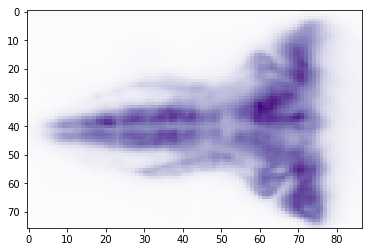

In [25]:
plt.imshow(img[0,:,:], interpolation='nearest', aspect='auto', cmap='Purples')

/home/kranthidr/.virtualenvs/pyspark27-lab/lib/python2.7/site-packages/thunder/images/images.py:320: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.map(lambda v: v[slices], value_shape=new_value_shape)


(20, 2, 16, 18)


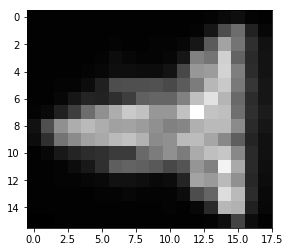

In [26]:
# plot subsampled data
subsampled = data.subsample((1, 5, 5))
plt.imshow(subsampled.first()[0, : ,:], interpolation='nearest', aspect='equal', cmap='gray')
print(subsampled.shape)

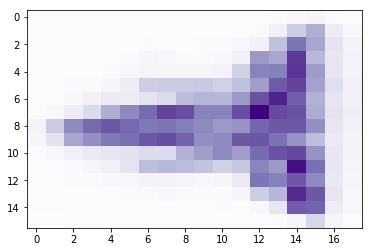

In [27]:
plt.imshow(subsampled.first()[0, : ,:], interpolation='nearest', aspect='auto', cmap='Purples')

In [28]:
# reshuffle data to series representation
series = data.toseries()
print(type(series))

<class 'thunder.series.series.Series'>


In [29]:
print(series.shape)
print(series.index)
print(series.count())
print(series.values._rdd.takeSample(False, 1)[0])
print(series.max().values)

(2, 76, 87, 20)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
13224
((0, 62, 48), array([28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28], dtype=uint8))
[[[[158 152 145 143 142 141 140 140 139 139 140 140 142 144 153 168 179
    185 185 182]]]]


In [30]:
print(series.values._rdd.first())
print(series.values._rdd.top(1))
print(data.shape)

((0, 0, 0), array([26, 26, 26, 26, 26, 26, 26, 25, 26, 25, 25, 25, 26, 26, 26, 26, 26,
       26, 26, 26], dtype=uint8))
[((1, 75, 86), array([26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26], dtype=uint8))]
(20, 2, 76, 87)


In [31]:
print(type(series.min()),series.min().values)

(<class 'thunder.series.series.Series'>, BoltArray
mode: local
shape: (1, 1, 1, 20)
)


In [32]:
stddev = series.map(lambda s:s.std())

In [33]:
print(type(stddev),type(stddev.values),type(stddev.value_shape))
print(stddev)
print(stddev.values)
print(stddev.value_shape)

(<class 'thunder.series.series.Series'>, <class 'bolt.spark.array.BoltArraySpark'>, <type 'tuple'>)
Series
mode: spark
dtype: float64
shape: (2, 76, 87, 1)
BoltArray
mode: spark
shape: (2, 76, 87, 1)

(1,)


In [34]:
print(stddev.values._rdd.take(3))

[((0, 0, 0), array([0.4])), ((0, 0, 1), array([0.35707142])), ((0, 0, 2), array([0.45825757]))]


In [35]:
repacked = stddev.toarray()
print(type(repacked), repacked.shape)

(<type 'numpy.ndarray'>, (2, 76, 87))


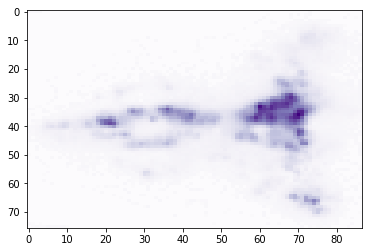

In [36]:
plt.imshow(repacked[0, : ,:], interpolation='nearest', aspect='auto', cmap='Purples')

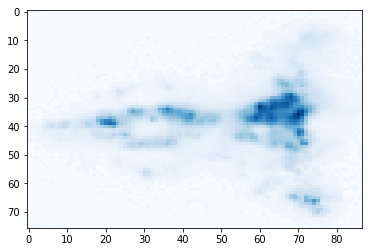

In [37]:
plt.imshow(repacked[0, : ,:], interpolation='nearest', aspect='auto', cmap='Blues')

In [38]:
print(series.mean().values)
print(series.std().values)
print(series.toarray().shape)
print(series.center().shape)

[[[[53.83272837 53.72640653 53.55096794 53.19971264 53.10949788
    52.9796582  52.78871748 52.66855717 52.56170599 52.51149425
    52.41757411 52.78433152 53.15683606 53.55784936 53.88150333
    54.23812765 54.4126588  54.50642771 54.49485783 54.40154265]]]]
[[[[32.09861496 31.90533267 31.66028804 31.22154792 31.1035187
    30.94402173 30.7526548  30.6247292  30.51473572 30.47730585
    30.38448685 30.76637435 31.19972631 31.68788223 32.11323135
    32.57638789 32.8279617  32.97477387 32.9603348  32.80253554]]]]
(2, 76, 87, 20)
(2, 76, 87, 20)


In [39]:
series.sample(seed=1)

Series
mode: local
dtype: uint8
shape: (100, 20)

In [40]:
print(series.center().toarray()[0,:,:].shape)

(76, 87, 20)


In [41]:
print(series.center().sample(50, seed=1).toarray().shape)

(50, 20)


In [42]:
print(series.center().sample(50, seed=1).toarray().T.shape)

(20, 50)


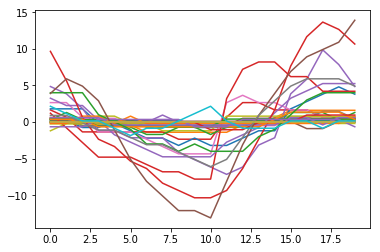

In [43]:
plt.plot(series.center().sample(50, seed=1).toarray().T)
plt.show()

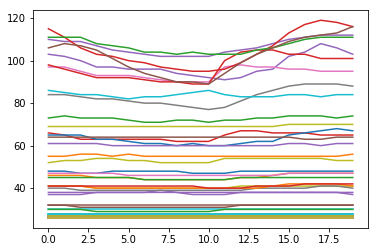

In [44]:
plt.plot(series.sample(50, seed=1).toarray().T)
plt.show()

In [45]:
images = td.images.frombinary(path+'/fish-long', order='F',engine=sc)
image_series = images.toseries()
print(image_series.shape)

(76, 87, 2, 240)


In [46]:
print(image_series.sample(1,seed=1).values)

[[27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27.
  27. 27. 27. 27. 27. 27.]]


In [47]:
normalized = image_series.normalize(method='mean')

In [48]:
stddevs = normalized.map(lambda s:s.std()).sample(1000, seed=1)

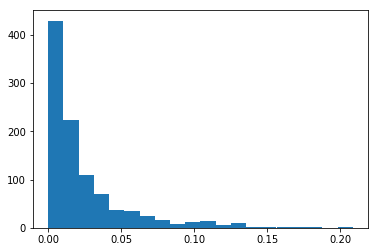

In [49]:
plt.hist(stddevs.values,bins=20)
plt.show()

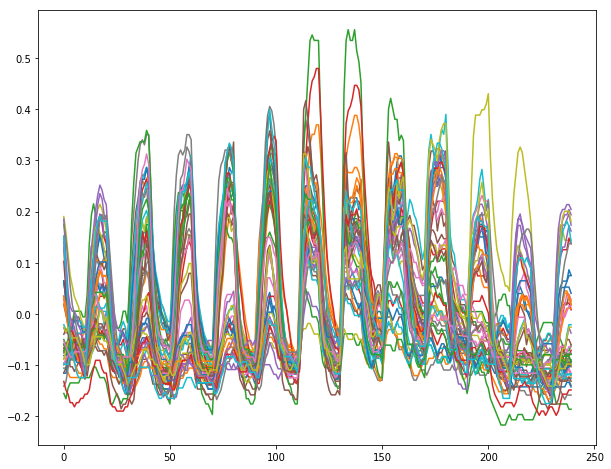

In [50]:
plt.figure(figsize=(10,8))
plt.plot(normalized.filter(lambda x:x.std() >=0.1).sample(50, seed=1).toarray().T)
plt.show()

In [51]:
from pyspark.mllib.clustering import KMeans

In [52]:
normalized.cache()

Series
mode: spark
dtype: float16
shape: (76, 87, 2, 240)

In [53]:
ks = [5, 10, 15, 20, 30, 50, 100, 200]
models = []
for k in ks:
    models.append(KMeans.train(normalized.values._rdd.values(), k))

In [54]:
def model_error_1(model):
    def series_error(sr):
        cluster_id = model.predict(sr)
        center = model.centers[cluster_id]
        diff = center - sr
        return diff.dot(diff) ** 0.5
    return (normalized.map(series_error).toarray().sum())

def model_error_2(model):
    return model.computeCost(normalized.values._rdd.values())

In [55]:
print(model_error_1(models[0]))
print(model_error_2(models[0]))

3110.585406181742
1368.64155787


In [56]:
import numpy as np

In [57]:
error_1 = np.asarray(list(map(model_error_1,models)))

In [58]:
error_2 = np.asarray(list(map(model_error_2,models)))

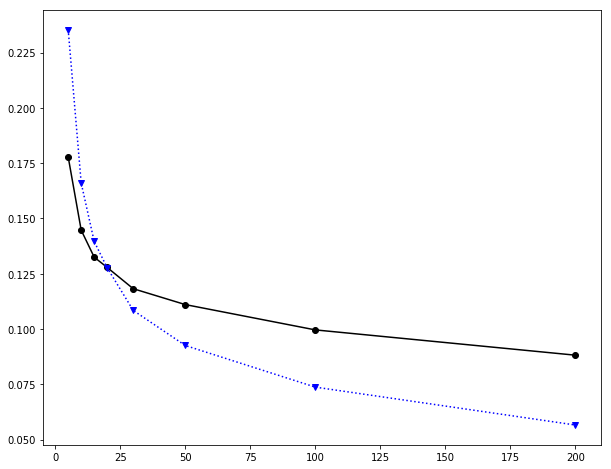

In [59]:
plt.figure(figsize=(10,8))
plt.plot(ks, error_1/error_1.sum(), 'k-o',
         ks, error_2/error_2.sum(), 'b:v')
plt.show()

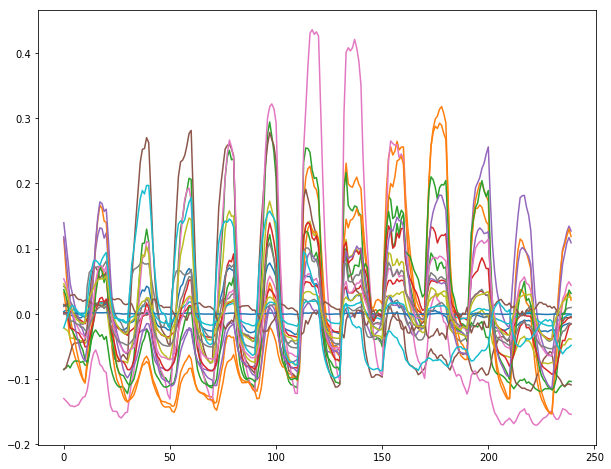

In [60]:
# plot the best performing model
plt.figure(figsize=(10,8))
model20 = models[3]
plt.plot(np.asarray(model20.centers).T)
plt.show()

In [61]:
# finally, plot each brain region according to its characteristic behavior
from matplotlib.colors import ListedColormap
cmap_cat = ListedColormap(sns.color_palette("hls", 10), name='from_list')
by_cluster = normalized.map(lambda s: model20.predict(s)).toarray()

In [62]:
print(normalized.values)
print(normalized.values.first())

BoltArray
mode: spark
shape: (76, 87, 2, 240)

[ 0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663 -0.03195
  0.00663 -0.03195 -0.03195 -0.03195  0.00663  0.00663  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663 -0.03195  0.00663  0.00663  0.00663
 -0.03195 -0.03195  0.00663  0.00663  0.00663 -0.03195 -0.03195  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663 -0.03195  0.00663  0.00663
 -0.03195  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663 -0.03195  0.00663
 -0.03195 -0.03195 -0.03195  0.00663  0.00663  0.00663  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663 -0.03195  0.00663  0.00663
  0.00663  0.00663  0.00663 -0.03195  0.00663 -0.03195  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663 -0.03195
 -0.

In [63]:
print(normalized.values.shape,by_cluster.shape)

((76, 87, 2, 240), (76, 87, 2))


In [64]:
print(by_cluster)

[[[10 10]
  [ 9 10]
  [ 9 10]
  ...
  [10 10]
  [10 10]
  [10 10]]

 [[10 10]
  [10 10]
  [10 10]
  ...
  [10 10]
  [10 10]
  [10 10]]

 [[10 10]
  [10 10]
  [10 10]
  ...
  [10 10]
  [ 9 10]
  [10 10]]

 ...

 [[10 10]
  [10 10]
  [10 10]
  ...
  [10 10]
  [10 10]
  [10 10]]

 [[ 9 10]
  [10 10]
  [10 10]
  ...
  [ 9 10]
  [10 10]
  [10 10]]

 [[10 10]
  [10 10]
  [ 9 10]
  ...
  [10 10]
  [10 10]
  [10 10]]]


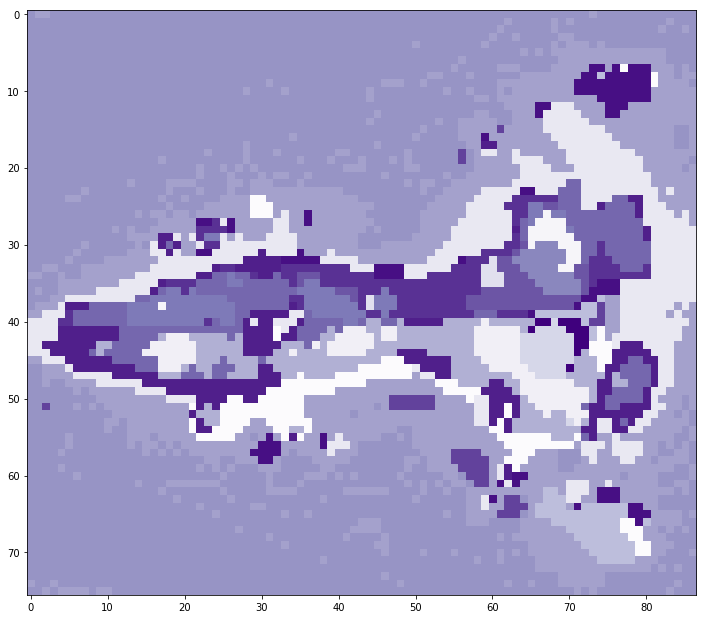

In [65]:
plt.figure(figsize=(12,12))
plt.imshow(by_cluster[:, :, 0], interpolation='nearest',
    aspect='equal', cmap='Purples')
plt.show()

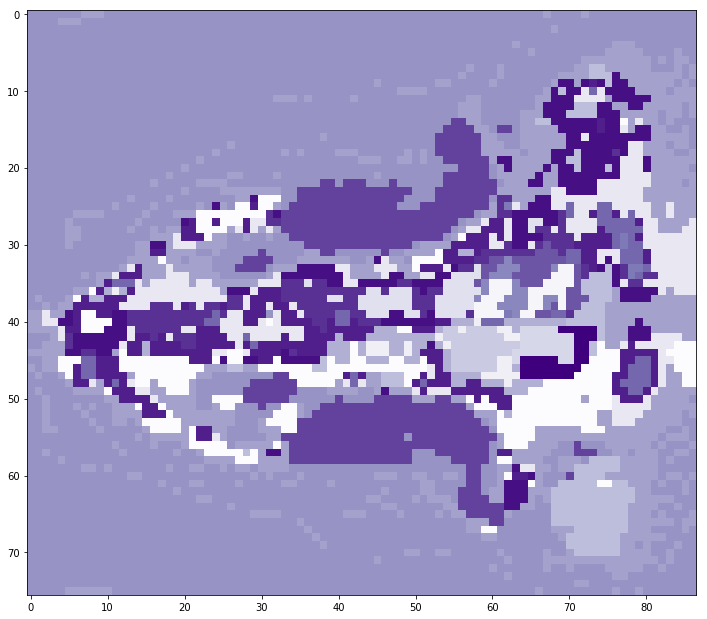

In [66]:
plt.figure(figsize=(12,12))
plt.imshow(by_cluster[:, :, 1], interpolation='nearest',
    aspect='equal', cmap='Purples')
plt.show()

In [67]:
fish = td.images.fromexample('fish')

In [68]:
fish.shape

(20, 2, 76, 87)